<a href="https://colab.research.google.com/github/mateberson/titanic_challenge/blob/main/estudo_de_caso_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fluxo de desenvolvimento

O processo de desenvolvimento deste estudo de caso passará por sete etapas distintas;
1. Definir o problema;
2. Obter os dados de treino e teste;
3. Preparar e limpar os dados;
4. Analisar, indentificar padrões e explorar os dados;
5. Modelar, prever e resolver o problema;
6. Visualizar, reportar e apresentar as etapas de solução do problema e a resolução final;
7. Enviar os resultados

# Definir o problema

Este estudo de caso consiste em desenvolver uma solução capaz de identificar os padrões dos dados apresentados de cada passageiro do Titanic e prever se está pessoa sobreviveu ou não ao acidente. Abaixo segue algumas notas de conhecimento referente ao caso do acidente:
* Em 15 de abril de 1912, durante sua viagem de inauguração, o Titanic colidiu com um icebag, matando 1502 dos 2224 passageiros e tripulação. A taxa de sobrevivência foi de 32%;
* Umas das razões do naufrágio ter causado tantas perdas de vidas foi devido ao fato do navio não possui botes salva-vidas suficiente para os passageiros e tripulação;
* Embora houvesse alguns elementos de sorte envolvendo a sobrevivencia ao naufrágio, alguns grupos de pessoas possuiam mais chances de sobreviver que outros sendo mulheres, crianças e pessoas da primeira classe;

# Importando bibliotecas

In [ ]:
# Análise de dados
import pandas as pd
import numpy as np
import random as rnd

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
# sns.set_style('whitegrid')

# Aprendizado de máquina
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Obter os dados de treino e teste
Primeiro será criado os dataframes responsáveis por armazenar os dados de treino e teste, assim como eles serão combinados em um terceiro dataframe para que seja feito todas as operações de tratamento em abas as bases.

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

# Análise por descrição dos dados

Visualização dos atributos das base de dados do estudo.

In [ ]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


_survived_: identificador de sobrevivencia do passageiro
* 0 = Não
* 1 = Sim

_pclass_: identificador da classe social econômica do passageiro
* 1 = Alta
* 2 = Média
* 3 = Baixa

_name_: nome do passageiro, no dataset o nome é constituído desta forma...

_sex_: genêro do passageiro

_age_: Idade em anos. A idade é fracionada se for menor que 1. Se a idade for estimada, ela vira no formado xx.5

_sibsp_: O dataset define a familiaridade desta forma...
* Sibling = irmão, irmã, meio-irmão, meia-irmã
* Spouse = marido, esposa (amantes e noivos foram ignorados)

_parch_: O dataset define a familiaridade desta forma...
* Parent = mãe, pai
* Child = filha, filho, enteada, enteado
> Algumas crianças viajavam com uma babá, portanto parch=0 para elas.

_ticket_: número da passagem

_fare_: preço da passagem

_cabin_: número da cabine

_embarked_: Porto de embarque
* C = Cherbourg 
* Q = Queenstown
* S = Southampton

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Identificação dos tipos de dados:

* **Dados Qualitativos**
> * *Nominais:* Survived, Sex and Embarked;
> * *Ordinais:* Pclass;

* **Dados Quantitativos**
> * *Continuos:* Age, Fare;
> * *Discretos:* SibSp, Parch;

In [ ]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Algumas variáveis possuem dados Númericos ou Alfanúmericos que podem ser candidatos a sofrerem correções:
* Ticket é uma mistura de dados númericos e alfanúmericos;
* Cabain são dados alfanúmericos;

Para a variável de nome ela pode ter erros de digitação, assim como dados de descrição como título, nomes entre parênteses e citações usadas para nome alternativo ou abreviatura;

In [ ]:
train_df.info()
print('\n','-'*40,'\n')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

 ---------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passe

Dados que precisam ser corrigidos:
* Cabin > Age > Embarked: Possuem dados faltantes;
* Cabin > Age: Possuem dados incompletos;

Os dados apresentam os seguites tipos:
* Sete parâmetros possuem dados to tipo inteiro ou ponto flutuante;
* Cinco parâmetros possuem dados do tipo texto;

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


A distribuição dos parâmetros númericos da amostra de treino apresentam as seguintes características:
* O total da amostra de 891 representa 40% do número real de passageiros abordo do Titanic (2.224);
* A maioria dos passageiros (> 75%) não viajavam com parentes ou crianças;
* Aproximadamente 30% dos passageiros possuiam irmãos/irmãs ou esposas/maridos;
* O valor da passagem vária significativamente, com poucos passageiros (< 1%) pagando até $512;
* Poucas passageiros (< 1%) estavam entre a faixa etária de 65-80 anos;

In [ ]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


A distribuição dos parâmetros categóricos da amostra de treino apresentam as seguintes características:
* Nomes são únicos dentro da amostra (count=unique=891);
* Sexo vária entre suas duas opções, sendo o valor para homens de 65% (top=male, freq=577/count=891)
* Cabines possuem vários valores duplicados. Possivelmente vários passageiros dividiam uma cabine;
* Entre os postos de embarcação, o porto S foi o mais usado pelos passageiros (top=S)
* O parâmetro Ticket possui uma alta proporção (22%) de dados duplicados (unique=681)



# Análise por pareamento de dados
Nesta etapa será realizado comparativos de dados a fim de validas as informações obtidas na análise anterior. Para tal tomada de decisão é necessário comparar dados não faltantes do tipo Nominal (Sex), Ordinal (Pclass) ou discreto (sibSp, Parch)

In [ ]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Pode-se observar uma taxa de correlão considerável (> 0.5) entre Pclass=1 e Survived, sendo assim este parâmetro entrara no modelo;

In [ ]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Este comparativo confirma a observação durante a definição do problema que Sex=female tem uma taxa de sobrevivência de 74%, também entrando no modelo;

In [ ]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


**SibSp** e **Parch** possui correlação zero para alguns valores, sendo assim uma melhor opção seria criar um parâmetro derivado ou um conjunto de parâmetros destes parâmetros individuais;

# Análise por visualização de dados

## Correlação de dados continuos

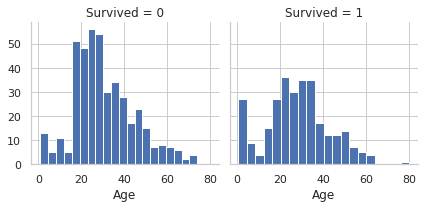

In [ ]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

* Crianças (Age <=4) tem uma alta taxa de sobrevivência;
* O passageiros mais velhos (Age=80) sobreviveram;
* Uma grande quantidade de passageiros entre 15-25 anos não sobreviveram;
* A maioria dos passageiros tinham entre 15 a 35 anos;

Por meio destas observações pode-se concluir que o parâmetro Age entre para o modelo de treino.

## Correlação de dados ordinais e continuos

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


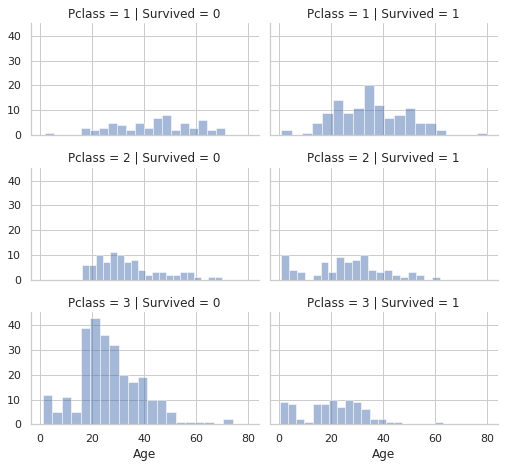

In [ ]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

* Pclass=3 tem a maior concentração de passageiros, contudo a maioria deles não sobreviveu;
* A maioria das crianças na Pclass=2 e Pclass=3 sobreviveram;
* A maioria dos passageiros da Pclass=1 sobreviveram;
* Pclass varia em termos de idade distribuida entre os passageiros;

## Correlação de dados categóricos

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


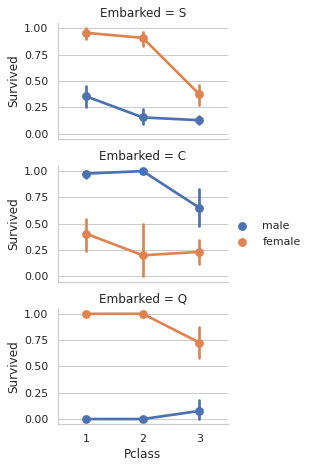

In [ ]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

* Mulheres tem mais chances de sobreviver que homens;
* Com excessão de Embarked=C, onde homens tem uma maior chance de sobreviver, esta correlação pode vir pela correlação entre Pclass e Embarked e por seguência entre Pclass e Survived, não há necessariamente uma correlação entre Embarked e Survived;
* Homens tem uma taxa de sobrevivência melhor na Pclass=3 em comparação com Pclass=2 no porto Q;
* Portos de embarcação tem taxas de sobrevivência variadas entre os homens na Pclass=3;

Com essas analises é possível concluir que Embarked deve entrar no modelo de treinamento;

# Correlação de dados categóricos e continuos

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


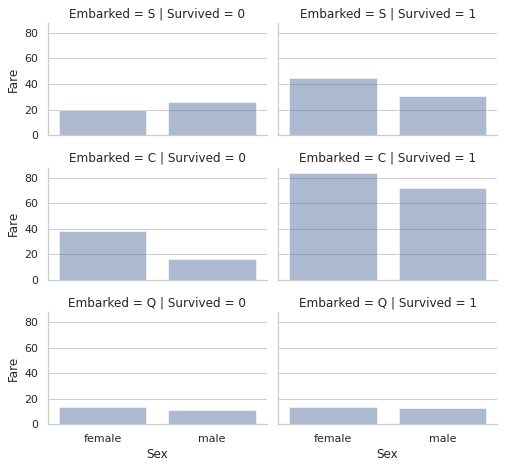

In [ ]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

* Passageiros que pagaram mais caro por suas tarifas tiveram uma maior chance de sobreviver;
* Porto de embarque tem correlação com taxa de sobrevivência;

# Tratamento de Dados

Nesta etapa será aplicado o tratamento nos dados faltantes, assim como a criação de novos parâmetros a partir da combinação de outros parâmetros.

## Remoção de dados

Inicialmente será removido os parâmetros Ticket e Cabain visto que ambos não apresentam dados consistentes o suficiente para que possa entrar no modelo.

In [ ]:
print('Antes', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print('Depois', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Antes (891, 12) (418, 11) (891, 12) (418, 11)
Depois (891, 10) (418, 9) (891, 10) (418, 9)


## Criação de novos parâmetros

 O primeiro parâmetro a ser estudado será o nome, visando encontrar correlações entre o título e o survivel.

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Há uma certa pulverização de títulos, podendo estes serem concatenados e um grupo especifico, por exemplo 'Rare'.

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 
                                                 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Para facilitar o treinamento será convertido os títulos em dados ordinais.

In [ ]:
title_mapping = {
    'Mr': 1,
    'Miss': 2,
    'Mrs': 3,
    'Master': 4,
    'Rare': 5
}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Agora sim Name e PassengerId poderá ser removido sem problemas.

In [ ]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

print(train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

(891, 9) (418, 9) (891, 9) (418, 9)


## Conversão de dados

Neste momento será subistituido os dados em formato de texto para o numeral visto que alguns algoritmos trabalham melhores com dados númericos.

In [ ]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({ 'female': 1, 'male': 0 }).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


## Completando dados faltantes

Agora será analisado os parâmetros que possuem dados faltantes, iniciando pela idade.

Para a idade é possível considerar três métodos para completar os dados faltantes, sendo eles:


1.   Uma forma simples seria gerar um número aleatório entre a média de idade e o desvio padrão da idade;
2.   Outra forma de completar os valores nulos seria correlacionar a idade com outros parâmetros;
    > Devido as análises anteriores foi possível encontrar uma forte correlação entre **Pclass** e **Sex**
3.   Por fim a combinação de ambos os métodos citados anteriormente;

Pelo fato das opções 1 e 3 gerarem valores aleatórios não seria de mais valia devido a fato de gerar uma aleatoridade dentro do modelo de estudo.









/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


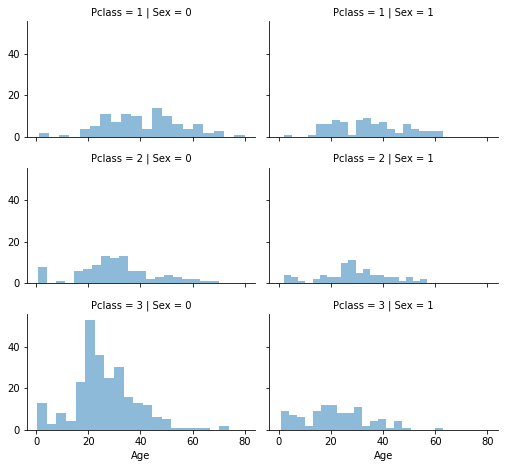

In [ ]:
grid = sns.FacetGrid(train_df, row='Pclass',col='Sex', size=2.2,aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Constatado a correlação entre **Age**, **Pclass** e **Sex**, será construído uma matriz para armazenar os valores destas relações.

In [ ]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

O próximo passa será a iteração entre sexo e classe, buscando desta forma os supostos valores das idades que serão usadas futuramente.

In [ ]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i) &
                               (dataset['Pclass'] == j+1)]['Age'].dropna()
            
            age_guess = guess_df.median()

            guess_ages[i,j] = int(age_guess/0.5 + 0.5) * 0.5

    for i in range(0,2):
        for j in range(0,3):            
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age' ] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Feito a subistituição das idades, será realizado um agrupamento das idades a fim de correlacionar a sobrevivência do passageiro com a faixa etária na qual ele pertence.

In [ ]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Tendo em conhecimento as faixas etárias será subistituído a idade dos passageiros.

In [ ]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


Por fim será removido o parâmetro **AgeBand**

In [ ]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


## Criando novos parâmetros pela combinação dos existentes

Inicialmente será criado o paramêtro **FamilySize** sendo este um combinação de **SibSp** e **Parch**. Com isso será possível remover estes parâmetros do nosso modelo de treino.

In [ ]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Outro parâmetro relacionado com o **FamilySize** que poderia ser criado é se o passageiro viajava sozinho.

In [ ]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Ao analisar o parâmetro **FamilySize** pode-se evidenciar que alguns valores apresentam valores zerados, por isso ele será removido em favor do **IsAlone**, assim como os parâmetros **Parch** e **SibSp**.

In [ ]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


O último parâmetro a ser criado é um parâmetro artificial sendo ele a combinação de **Age** e **Pclass**.

In [ ]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


## Completando dados categóricos

O parâmetro **Embarked** possui três valores base sendo eles:


*   S
*   Q
*   C

No dados de treino esse parâmetro possui dois valores faltantes. A forma mais simples de subistituir estes valores é aplicando o valor de maior frequência.


In [ ]:
freq_port = train_df.Embarked.dropna().mode()[0]

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


## Convertendo dados categóricos em númericos

O parâmetro **Embarked** agora pode ser convertido para uma forma númerica.

In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({ 'S': 0, 'C': 1, 'Q': 2 }).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


## Convertendo e completando um parâmetro númerico

O último parâmetro a ser tratado é o **Fare**, onde existe apenas um valor faltante na base de dados de teste, neste caso será aplicado a este valor a moda para o parâmetro, pegando o valor de maior frequência.

In [ ]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


Assim como a **Age**, o parâmetro **Fare** também passará por uma transformação o convertendo em uma faixa de valores.

In [ ]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Seguindo o mesmo método usado em **Age**, os valores das faixa para **Fare** subistituiram os valores deste parâmetro.

In [ ]:
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


Aqui a base de dados de test.

In [ ]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## Normalização dos dados

Todos os dados agora encontram em forma de categoria númerica, para que todos fiquem na mesma escala os parâmetros serão normalizados. 

In [ ]:
temp_combine = []
for dataset in [train_df.copy(), test_df.copy()]:
    list_to_dummies = []
    for col in dataset.columns:
        if (col != 'Survived') and (col != 'PassengerId') and (col != 'Age*Class'):
            list_to_dummies.append(col)
            dataset[col] = dataset[col].astype(str)
    temp_df = dataset.drop(['Age*Class'], axis=1)    
    temp_combine.append(pd.get_dummies(temp_df, columns=list_to_dummies))

In [ ]:
temp_combine[0].head(10)

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Age_0,Age_1,Age_2,Age_3,...,Embarked_0,Embarked_1,Embarked_2,Title_1,Title_2,Title_3,Title_4,Title_5,IsAlone_0,IsAlone_1
0,0,0,0,1,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
3,1,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
4,0,0,0,1,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
5,0,0,0,1,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
6,0,1,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
7,0,0,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
8,1,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
9,1,0,1,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
temp_combine[1].head(10)

,PassengerId,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Age_0,Age_1,Age_2,Age_3,...,Embarked_0,Embarked_1,Embarked_2,Title_1,Title_2,Title_3,Title_4,Title_5,IsAlone_0,IsAlone_1
0,892,0,0,1,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
1,893,0,0,1,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
2,894,0,1,0,1,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,1
3,895,0,0,1,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
4,896,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
5,897,0,0,1,1,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
6,898,0,0,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
7,899,0,1,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
8,900,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
9,901,0,0,1,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0


# Criando modelos de previsão

Neste ponto, após a limpeza dos dados de treino e teste, o próximo passo é criar os modelos de previsão e aplicar os dados de teste buscando solucionar o problema. Existe por volta de mais de 60 modelos de algoritmos passíveis de escolha, logo será necessário entender o problema para conseguir estreinar os modelos que serão usados para validar o estudo de caso. O problema apresentado é do tipo de classificação, sendo necessário identificar os relacionamentos entre a saída (Sobreviveu ou não) com os parâmetros (Gender, Age, Port...). Optou-se por seguir o paradigma de aprendizado Supervisionado. Reunindo esses dois critérios, Classificação e Aprendizado Supervisionado, inferir-se-a os seguintes modelos que servirão de previsores:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [ ]:
#X_train = temp_combine[0].drop('Survived', axis=1).copy()
#Y_train = temp_combine[0]['Survived']
#X_test = temp_combine[1].drop('PassengerId', axis=1).copy()
#X_train.shape, Y_train.shape, X_test.shape

X_train = train_df.drop('Survived', axis=1).copy()
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

Será definido uma função responsável por criar os modelos de validação.

In [ ]:
def createModelValidate(model, model_name):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    acc = round(model.score(X_train, Y_train) * 100, 2)
    temp_df = pd.DataFrame()
    data_row = {
        'Model': model_name,
        'Score': acc,
        'Predict': Y_pred
    }
    print(f'Acurácia {model_name}:  {acc}')
    return temp_df.append(data_row, ignore_index=True)

Será criado um dataframe com o objetivo de armazenar os dados de acurácia e as previsões feitas por cada modelo.

In [ ]:
models = pd.DataFrame(columns=['Model', 'Score', 'Predict'])

## Logistic Regression

A regressão logística é um modelo útil para ser executado no início do fluxo de trabalho. A regressão logística mede a relação entre a variável dependente categórica (característica) e uma ou mais variáveis ​​independentes (características) estimando probabilidades usando uma função logística, que é a distribuição logística cumulativa. Referência [Wikipedia](https://pt.wikipedia.org/wiki/Regress%C3%A3o_log%C3%ADstica).



In [ ]:
logreg = LogisticRegression()
models = models.append(createModelValidate(logreg, 'LogisticRegression'))

Acurácia LogisticRegression:  81.37


## k-Nearest Neighbors algorithm (kNN)

No reconhecimento de padrões, o algoritmo k-Nearest Neighbors (ou k-NN para abreviar) é um método não paramétrico usado para classificação e regressão. Uma amostra é classificada pelo voto majoritário de seus vizinhos, com a amostra sendo atribuída à classe mais comum entre seus k vizinhos mais próximos (k é um inteiro positivo, tipicamente pequeno). Se k = 1, então o objeto é simplesmente atribuído à classe daquele único vizinho mais próximo. Referência [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
models = models.append(createModelValidate(knn, 'KNeighborsClassifier'))

Acurácia KNeighborsClassifier:  84.06


## Support Vector Machines (SVM)

Support Vector Machines, que são modelos de aprendizado supervisionado com algoritmos de aprendizado associados que analisam dados usados ​​para classificação e análise de regressão. Dado um conjunto de amostras de treinamento, cada uma marcada como pertencente a uma ou outra de **duas categorias**, um algoritmo de treinamento SVM cria um modelo que atribui novas amostras de teste a uma categoria ou outra, tornando-o um binário não probabilístico classificador linear. Referência [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

In [ ]:
svc = SVC()
models = models.append(createModelValidate(svc, 'SVC'))

Acurácia SVC:  82.83


## Gaussian Naive Bayes

No aprendizado de máquina, os classificadores Naive Bayes são uma família de classificadores probabilísticos simples baseados na aplicação do teorema de Bayes com suposições de independência fortes entre os recursos. Os classificadores Naive Bayes são altamente escaláveis, exigindo uma série de parâmetros lineares no número de variáveis ​​(características) em um problema de aprendizado. Referência [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

In [ ]:
gaussian = GaussianNB()
models = models.append(createModelValidate(gaussian, 'GaussianNB'))

Acurácia GaussianNB:  76.88


## Decision Tree

Este modelo usa uma árvore de decisão como um modelo preditivo que mapeia características (galhos de árvore) para conclusões sobre o valor alvo (folhas de árvore). Os modelos de árvore em que a variável de destino pode assumir um conjunto finito de valores são chamados de árvores de classificação; nessas estruturas de árvore, as folhas representam rótulos de classe e ramos representam conjunções de recursos que levam a esses rótulos de classe. As árvores de decisão em que a variável de destino pode assumir valores contínuos (geralmente números reais) são chamadas de árvores de regressão. Referência [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

In [ ]:
decision_tree = DecisionTreeClassifier()
models = models.append(createModelValidate(decision_tree, 'DecisionTreeClassifier'))

Acurácia DecisionTreeClassifier:  86.64


## Random Forest

O próximo modelo Random Forests é um dos mais populares. Florestas aleatórias ou florestas de decisão aleatória são um método de aprendizado conjunto para classificação, regressão e outras tarefas, que operam construindo uma infinidade de árvores de decisão (n_estimators = 100) no tempo de treinamento e gerando a classe que é o modo das classes (classificação) ou previsão média (regressão) das árvores individuais. Referência [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
models = models.append(createModelValidate(random_forest, 'RandomForestClassifier'))

Acurácia RandomForestClassifier:  86.64


## Perceptron

O perceptron é um algoritmo para aprendizado supervisionado de classificadores binários (funções que podem decidir se uma entrada, representada por um vetor de números, pertence ou não a alguma classe específica). É um tipo de classificador linear, ou seja, um algoritmo de classificação que faz suas previsões com base em uma função de previsão linear combinando um conjunto de pesos com o vetor de características. O algoritmo permite o aprendizado online, pois processa os elementos do conjunto de treinamento um de cada vez. Referência [Wikipedia](https://en.wikipedia.org/wiki/Perceptron).

In [ ]:
perceptron = Perceptron()
models = models.append(createModelValidate(perceptron, 'Perceptron'))

Acurácia Perceptron:  79.35


## Stochastic Gradient Descent

In [ ]:
sgd = SGDClassifier()
models = models.append(createModelValidate(sgd, 'SGDClassifier'))

Acurácia SGDClassifier:  80.25


## Linear SVC

In [ ]:
linear_svc = LinearSVC()
models = models.append(createModelValidate(linear_svc, 'LinearSVC'))

Acurácia LinearSVC:  79.46


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


# Análise dos resultados

Por fim será análisado os resultados obtidos pelos treinamentos dos modelos e aplicado o que obtiver o melhor resultado.

In [ ]:
models.sort_values(by='Score', ascending=False)

,Model,Score,Predict
0,DecisionTreeClassifier,86.64,"[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, ..."
0,RandomForestClassifier,86.64,"[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, ..."
0,KNeighborsClassifier,84.06,"[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, ..."
0,SVC,82.83,"[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, ..."
0,LogisticRegression,81.37,"[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, ..."
0,SGDClassifier,80.25,"[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, ..."
0,LinearSVC,79.46,"[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, ..."
0,Perceptron,79.35,"[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, ..."
0,GaussianNB,76.88,"[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, ..."


Como pode-se observar os modelos de Decission Tree e Random Forest foram os que obtiveram os melhores resultados sendo assim ambos serão subimetidos.

In [ ]:
for pred, col in zip(models['Predict'], models['Model']):
    submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": pred
    })
    submission.to_csv(f'submission_{col}_not_normalized.csv', index=False)